In [44]:
#importing libraries

import sys
sys.path.append("../")

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Env.ProjectPaths import TEST_PATH
from Env.Constants import DS_JOBS, MY_COLORS
from scipy import stats




In [45]:

h1bdata_df = pd.read_csv(TEST_PATH + "H1BDATA_preprocessed_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/lucas/Documents/Studying/Pos-graduacao - Ciencia de Dados e  Analytics/Sprints/sprint I - Analise de salarios cientista de dados/data_science_job_market_analysis/Dataset/Output_analyse/H1BDATA_preprocessed_data.csv'

In [3]:
h1bdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78655 entries, 0 to 78654
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    78655 non-null  int64  
 1   Unnamed: 0.1  78655 non-null  int64  
 2   company       78655 non-null  object 
 3   title         78655 non-null  object 
 4   salary        78655 non-null  float64
 5   date          78655 non-null  object 
 6   city          78653 non-null  object 
 7   state         78655 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 4.8+ MB


(0.0, 250000.0)

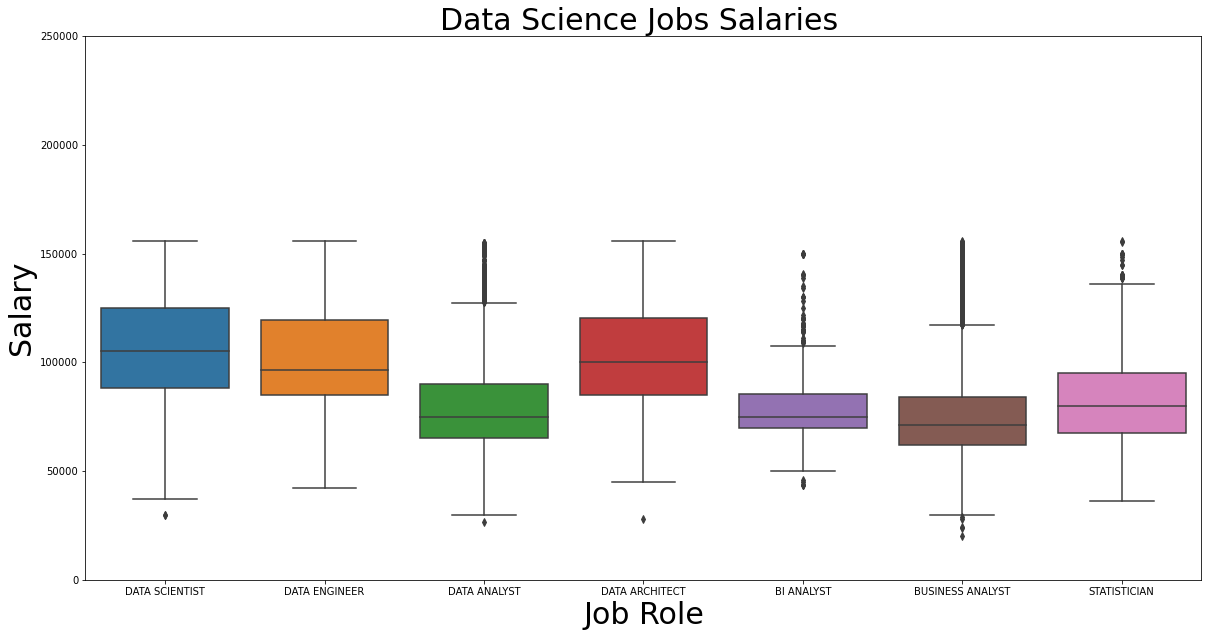

In [4]:

fig = plt.figure(figsize=(20,10))
fig.set_facecolor('white')


sns.boxplot(data=h1bdata_df, y="salary",x='title')
plt.title("Data Science Jobs Salaries ", fontsize=30)
plt.ylabel("Salary", fontsize=30)
plt.xlabel("Job Role", fontsize=30)
plt.ylim([0,2.5e5])

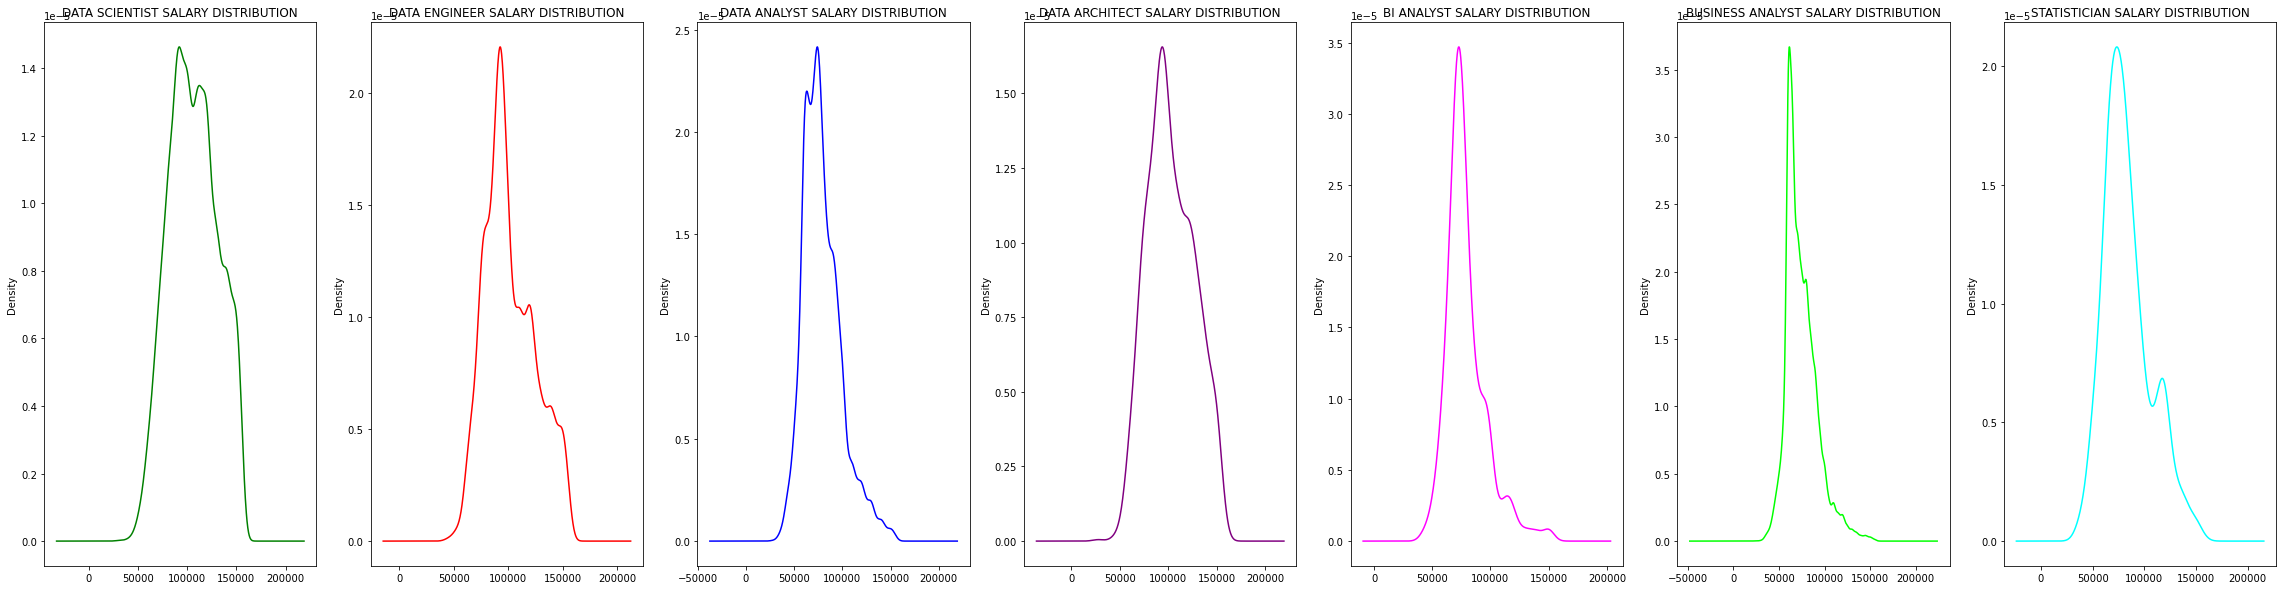

In [5]:


fig, axs = plt.subplots(1,7, figsize=(40,10))
fig.set_facecolor('white')
for (i,job) in zip(range(0, len(DS_JOBS) ), DS_JOBS):
  tmp_df = h1bdata_df[ h1bdata_df['title']== job ]['salary']
  tmp_df.plot(kind='density', ax= axs[i],color=MY_COLORS[i])
  axs[i].set_title(f"{job} SALARY DISTRIBUTION")
 

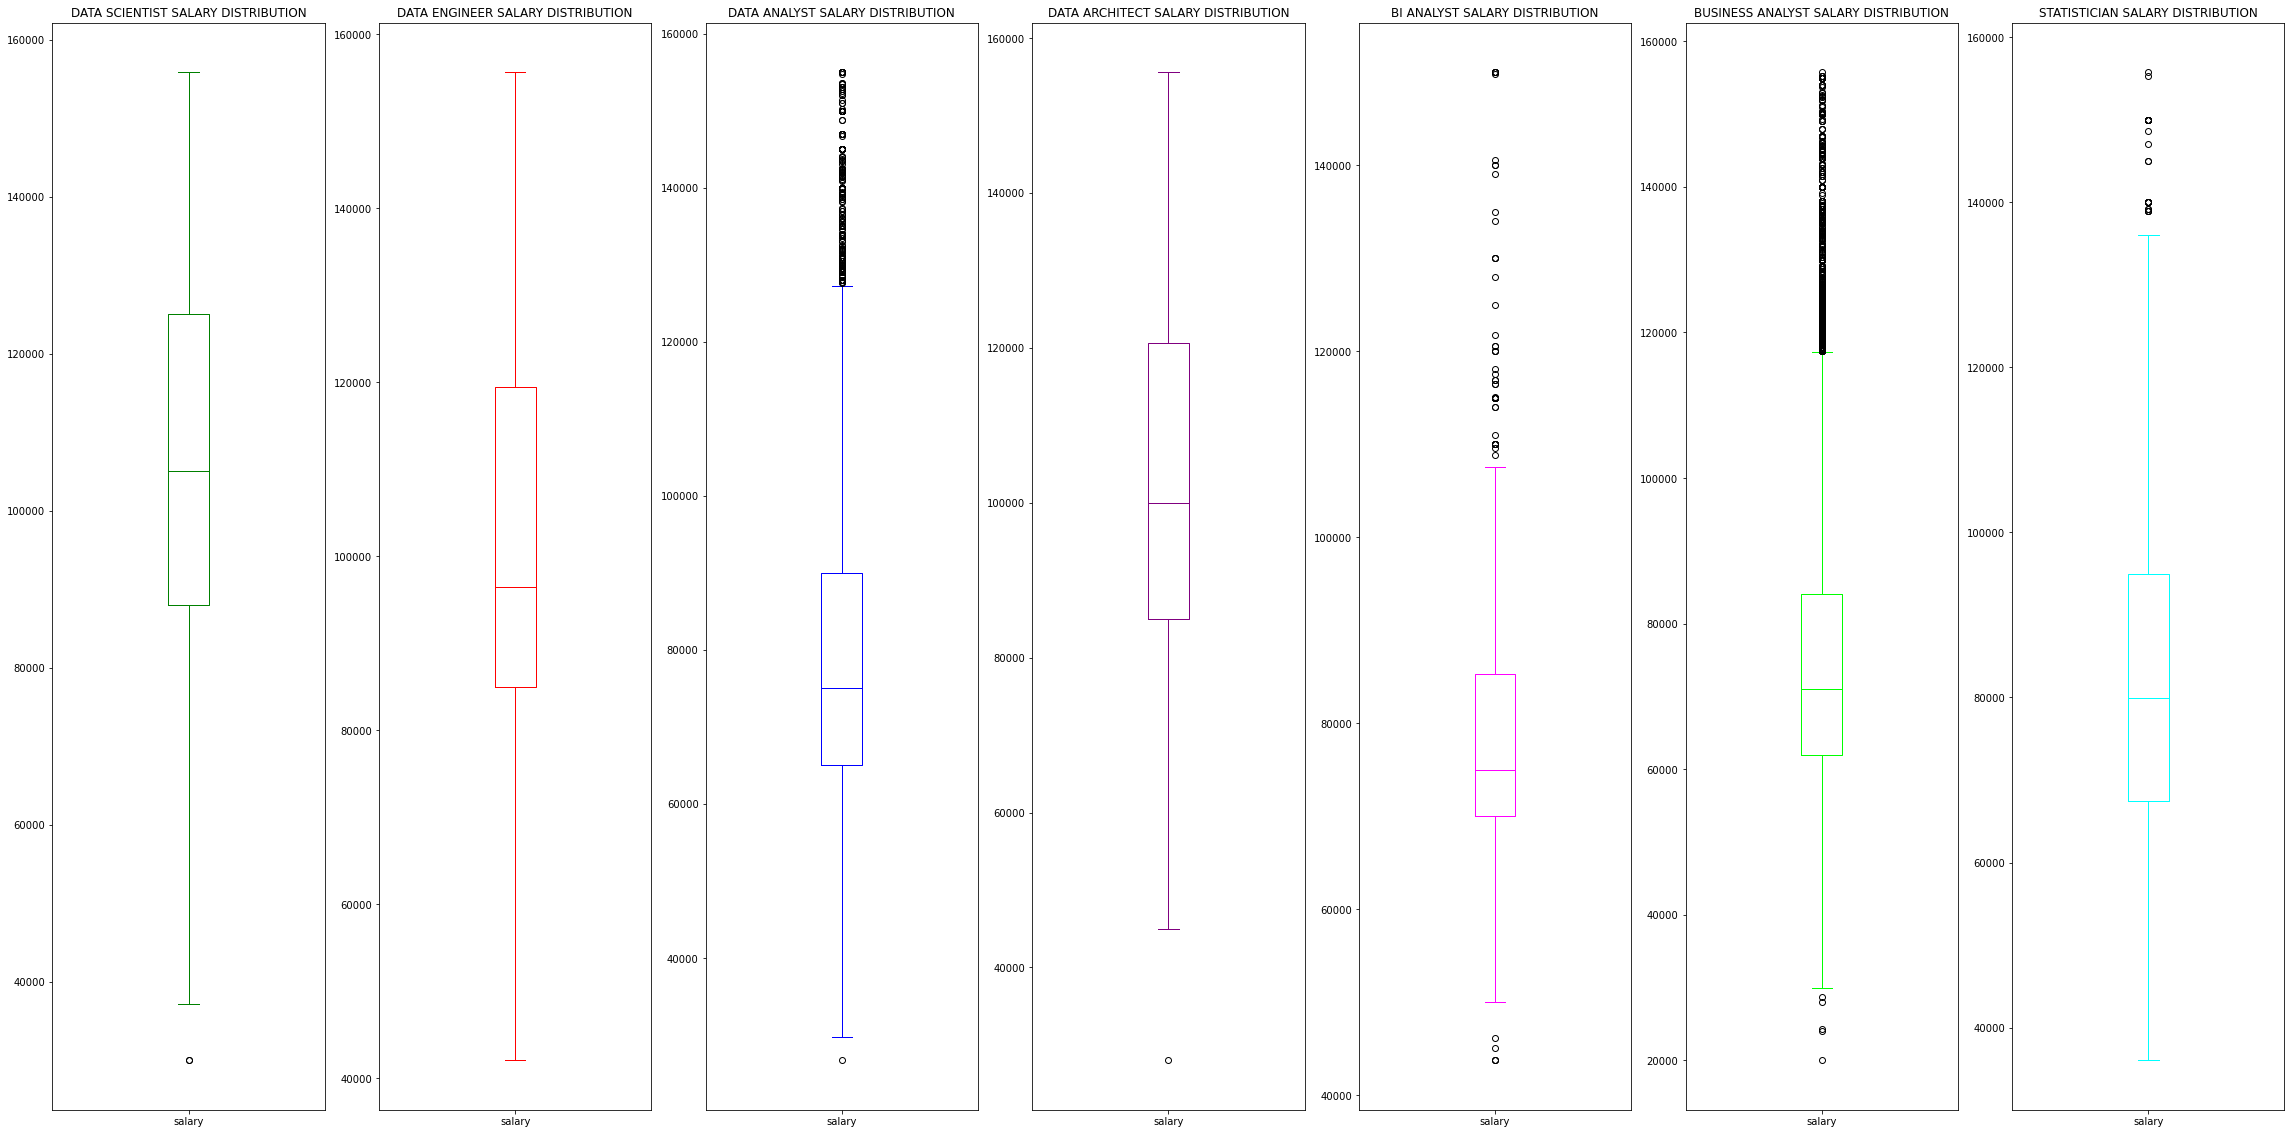

In [6]:
fig, axs = plt.subplots(1,7, figsize=(40,20))
fig.set_facecolor('white')
for (i,job) in zip(range(0, len(DS_JOBS) ), DS_JOBS):
  tmp_df = h1bdata_df[ h1bdata_df['title']== job ]['salary']
  tmp_df.plot(kind='box', ax= axs[i],color=MY_COLORS[i])
  axs[i].set_title(f"{job} SALARY DISTRIBUTION")
 

In [7]:


h1bdata_df['title'].value_counts()

BUSINESS ANALYST    39282
DATA SCIENTIST      14888
DATA ANALYST        11605
DATA ENGINEER        9749
DATA ARCHITECT       1457
STATISTICIAN         1024
BI ANALYST            650
Name: title, dtype: int64

In [8]:
h1bdata_df['state'].unique()

array(['FL', 'CA', 'NJ', 'GA', 'IL', 'WI', 'TX', 'MA', 'MI', 'WA', 'DE',
       'MD', 'NY', 'VA', 'MO', 'NC', 'TN', 'MN', 'IN', 'PA', 'OH', 'IA',
       'AZ', 'CO', 'UT', 'LA', 'OK', 'AR', 'OR', 'KS', 'NH', 'NV', 'NE',
       'CT', 'PR', 'DC', 'KY', 'SC', 'AL', 'NM', 'MS', 'ND', 'RI', 'ID',
       'HI', 'WY', 'SD', 'VT', 'ME', 'WV', 'MT', 'AK', 'VI'], dtype=object)

In [9]:
h1bdata_df['date']

0        09/04/2020
1        18/03/2016
2        18/02/2015
3        18/02/2015
4        16/03/2017
            ...    
78650    15/07/2020
78651    18/09/2019
78652    19/08/2019
78653    16/11/2022
78654    07/07/2015
Name: date, Length: 78655, dtype: object

OK! Test Passed on h1bdataDB!

## Testing Glassdoor jobs description database

In [10]:
glassdoor_df = pd.read_csv(TEST_PATH + 'job_description_glassdoor_preprocessed.csv')

In [11]:
glassdoor_df['Job Title'].value_counts()

DATA SCIENTIST               1151
DATA ANALYST                  988
DATA ENGINEER                 742
RESEARCHER                    217
MACHINE LEARNING ENGINEER     108
Name: Job Title, dtype: int64

In [12]:
glassdoor_df

,Unnamed: 0,Unnamed: 0.1,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,0,DATA SCIENTIST,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,unknown,unknown
1,1,1,1,DATA SCIENTIST,$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,unknown,unknown
2,2,2,2,DATA SCIENTIST,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,unknown,Decode_M,"New York, NY","New York, NY",1 to 50 employees,unknown,Unknown,unknown,unknown,Unknown / Non-Applicable,unknown,True
3,3,3,3,DATA ANALYST,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",unknown
4,4,4,4,DATA SCIENTIST,$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3201,3903,3903,4374,DATA ENGINEER,$55K-$112K (Glassdoor est.),ApTask is a leading staffing and recruitment c...,3.9,ApTask\n3.9,"Dublin, OH","Iselin, NJ",201 to 500 employees,2010,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),"Collabera, Mitchell Martin, The Judge Group",unknown
3202,3904,3904,4375,DATA ENGINEER,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),unknown,unknown
3203,3905,3905,4376,DATA ANALYST,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),unknown,unknown
3204,3906,3906,4377,DATA ENGINEER,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),unknown,unknown


In [35]:
from Env.ProjectPaths import *


map = pd.read_csv(DATASET_PATH + "Salaries_around_world/maps/countries_map.csv")
map = dict(map.values)

In [30]:
skills_df  = pd.read_csv(DATASET_PATH + '/Skills/it_skills_proeficiency_software_jobs.csv')
skills_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9178 entries, 0 to 9177
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Database Fundamentals            9178 non-null   object
 1   Computer Architecture            9178 non-null   object
 2   Distributed Computing Systems    9178 non-null   object
 3   Cyber Security                   9178 non-null   object
 4   Networking                       9178 non-null   object
 5   Software Development             9178 non-null   object
 6   Programming Skills               9178 non-null   object
 7   Project Management               9178 non-null   object
 8   Computer Forensics Fundamentals  9178 non-null   object
 9   Technical Communication          9178 non-null   object
 10  AI ML                            9178 non-null   object
 11  Software Engineering             9178 non-null   object
 12  Business Analysis                9

In [32]:
salaries_world_df = pd.read_csv(DATASET_PATH + 'Salaries_around_world/Composed_data/salaries_around_world.csv')
salaries_world_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2370 entries, 0 to 2369
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          2370 non-null   int64 
 1   work_year           2370 non-null   int64 
 2   experience_level    2370 non-null   object
 3   employment_type     2370 non-null   object
 4   job_title           2370 non-null   object
 5   salary              2370 non-null   int64 
 6   salary_currency     2370 non-null   object
 7   salary_in_usd       2370 non-null   int64 
 8   employee_residence  2370 non-null   object
 9   remote_ratio        2370 non-null   int64 
 10  company_location    2370 non-null   object
 11  company_size        2370 non-null   object
dtypes: int64(5), object(7)
memory usage: 222.3+ KB


In [47]:
PRE_PROCESSED_PATH = "C:/Users/lucas/Documents/Studying/Pos-graduacao - Ciencia de Dados e  Analytics/Sprints/sprint I - Analise de salarios cientista de dados/data_science_job_market_analysis/Dataset/Pre_processed_data/"
salaries_world_df_preprocessed = pd.read_csv(PRE_PROCESSED_PATH + "salaries_around_world_preprocessed.csv")

salaries_world_df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2325 non-null   int64  
 1   Unnamed: 0.1        2325 non-null   int64  
 2   work_year           2325 non-null   int64  
 3   experience_level    2325 non-null   object 
 4   employment_type     2325 non-null   object 
 5   job_title           2325 non-null   object 
 6   salary              2325 non-null   float64
 7   salary_currency     2325 non-null   object 
 8   salary_in_usd       2325 non-null   float64
 9   employee_residence  2325 non-null   object 
 10  remote_ratio        2325 non-null   int64  
 11  company_location    2325 non-null   object 
 12  company_size        2325 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 236.3+ KB


In [54]:
for col in salaries_world_df_preprocessed.columns[2:]:
    
    print('*******************************************')
    print(salaries_world_df_preprocessed[col].value_counts())

*******************************************
2022    1169
2023     781
2021     304
2020      71
Name: work_year, dtype: int64
*******************************************
SENIOR-LEVEL    1326
MID-LEVEL        680
ENTRY-LEVEL      238
EXPIRIENCED       81
Name: experience_level, dtype: int64
*******************************************
FT    2325
Name: employment_type, dtype: int64
*******************************************
DATA ENGINEER                   593
DATA SCIENTIST                  528
DATA ANALYST                    477
MACHINE LEARNING ENGINEER       304
RESEACHER                       160
DATA SCIENCE                    119
DATA ARCHITECT                   55
DATA ANALYTICS                   29
DATA MANAGER                     16
BI DEVELOPER                     11
DATA SPECIALIST                  10
CHIEF DATA OFFICER                9
DATA OPERATIONS ENGINEER          6
DATABASE ENGINEER                 4
DATA INFRASTRUCTURE ENGINEER      4
Name: job_title, dtype: int64
****